## Geographic Visualisation

### This script contains the following steps; 

### 1. Importing Visualisation Libraries and Data

### 2. Clean Data and Check Extreme Values

### 3. Plotting Choropleths


### 1. Importing Visualisation Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\senja\OneDrive\Documents\5. Learning\6. Data Analytics Immersion\WATSON\02. Data/us-states.json'

In [4]:
# Open us-state json file

f = open(r'C:\Users\senja\OneDrive\Documents\5. Learning\6. Data Analytics Immersion\WATSON\02. Data/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# Define path
path = r'C:\Users\senja\OneDrive\Documents\5. Learning\6. Data Analytics Immersion\WATSON'

In [6]:
path

'C:\\Users\\senja\\OneDrive\\Documents\\5. Learning\\6. Data Analytics Immersion\\WATSON'

In [7]:
# Import data
df = pd.read_excel(os.path.join(path, '02. Data\WA_Customers.xlsx'))

In [8]:
# Import data
df_no_income = pd.read_excel(os.path.join(path, '02. Data\WA_Customers_no_income.xlsx'))

### 2. Clean Data and Check Extreme Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Location Code                  9134 non-null   object 
 3   Customer Lifetime Value        9134 non-null   float64
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Employment Status              9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [10]:
df_no_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6817 non-null   int64  
 1   Customer ID                    6817 non-null   object 
 2   State                          6817 non-null   object 
 3   Location Code                  6817 non-null   object 
 4   Customer Lifetime Value        6817 non-null   float64
 5   Coverage                       6817 non-null   object 
 6   Education                      6817 non-null   object 
 7   Employment Status              6817 non-null   object 
 8   Gender                         6817 non-null   object 
 9   Income                         6817 non-null   int64  
 10  Marital Status                 6817 non-null   object 
 11  Monthly Premium Auto           6817 non-null   int64  
 12  Months Since Last Claim        6817 non-null   i

In [11]:
#remove the unnamed column
df_no_income.drop(columns = ['Unnamed: 0'], inplace = True)

In [12]:
#check for columns
df_no_income.columns

Index(['Customer ID', 'State', 'Location Code', 'Customer Lifetime Value',
       'Coverage', 'Education', 'Employment Status', 'Gender', 'Income',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Sales Channel',
       'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [13]:
df.State.shape

(9134,)

In [14]:
print(df['State'].value_counts(),'\n')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 



In [15]:
df_no_income.State.shape

(6817,)

In [16]:
print(df_no_income['State'].value_counts(),'\n')

California    2346
Oregon        1937
Arizona       1273
Nevada         665
Washington     596
Name: State, dtype: int64 



In [17]:
print(df['Monthly Premium Auto'].value_counts(),'\n')

65     348
66     307
71     304
73     302
63     289
      ... 
147      1
290      1
273      1
298      1
205      1
Name: Monthly Premium Auto, Length: 202, dtype: int64 



In [18]:
print(df['Total Claim Amount'].value_counts(),'\n')

316.800000     116
292.800000     110
312.000000     108
350.400000     105
331.200000     102
              ... 
480.073548       1
232.674417       1
424.711758       1
1272.546918      1
11.549207        1
Name: Total Claim Amount, Length: 5106, dtype: int64 



In [19]:
# round the desimals
df['Total Claim Amount'].round(0)

0        385.0
1       1131.0
2        566.0
3        530.0
4        138.0
         ...  
9129     198.0
9130     379.0
9131     791.0
9132     691.0
9133     370.0
Name: Total Claim Amount, Length: 9134, dtype: float64

In [20]:
print(df['Customer Lifetime Value'].value_counts(),'\n')

2248.449633     6
10972.067780    6
5619.689084     6
11981.984810    6
2530.705137     6
               ..
12349.702320    1
4046.936065     1
2121.313061     1
7232.609391     1
3297.904615     1
Name: Customer Lifetime Value, Length: 8041, dtype: int64 



In [21]:
# round the desimals
df['Customer Lifetime Value'].round(0)

0        2764.0
1        6980.0
2       12887.0
3        7646.0
4        2814.0
         ...   
9129    23406.0
9130     3097.0
9131     8164.0
9132     7524.0
9133     2612.0
Name: Customer Lifetime Value, Length: 9134, dtype: float64

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Count'>

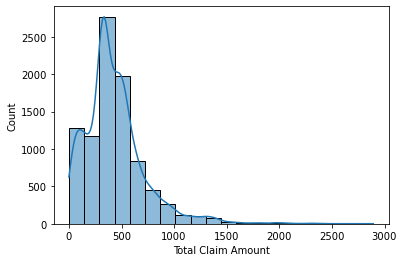

In [22]:
# shows extreme values for the total claims - entire dataframe
sns.histplot(df['Total Claim Amount'], bins=20, kde = True)  

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Count'>

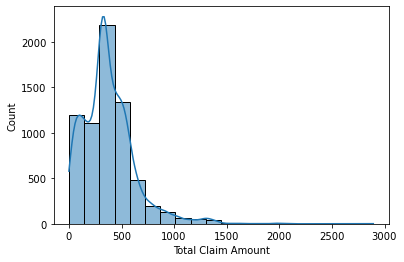

In [23]:
# shows extreme values for the total claims - - excluding customers with 0 income
sns.histplot(df_no_income['Total Claim Amount'], bins=20, kde = True)  

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Count'>

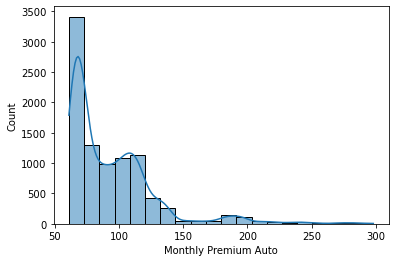

In [24]:
# shows the extreme values for Monthly Premium auto - entire dataframe
sns.histplot(df['Monthly Premium Auto'], bins=20, kde = True)

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Count'>

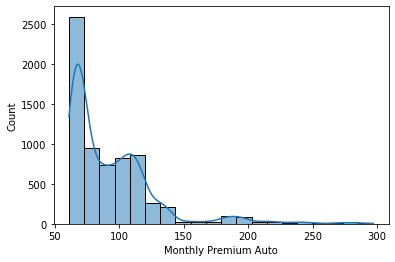

In [25]:
# shows the extreme values for Monthly Premium auto - excluding customers with 0 income
sns.histplot(df_no_income['Monthly Premium Auto'], bins=20, kde = True) 

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Count'>

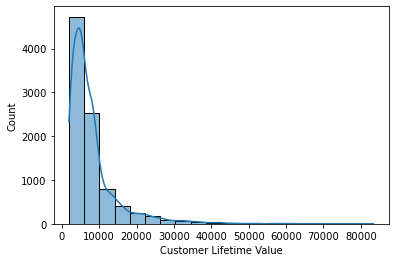

In [26]:
# shows extreme values for the customer lifetime values - entire dataframe
sns.histplot(df['Customer Lifetime Value'], bins=20, kde = True) 

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Count'>

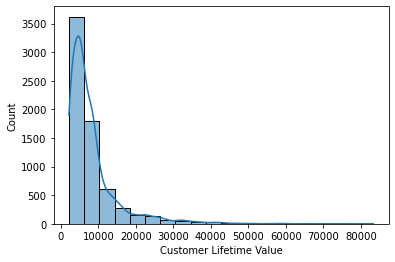

In [27]:
# shows extreme values for the customer lifetime values - excluding customers with 0 income
sns.histplot(df_no_income['Customer Lifetime Value'], bins=20, kde = True)  

### 3. Plotting Choropleths

In [28]:
# Create a data frame with just the States and Total Claim Amount 

data_to_plot = df[['State','Total Claim Amount']]
data_to_plot.head()

,State,Total Claim Amount
0,Washington,384.811147
1,Arizona,1131.464935
2,Nevada,566.472247
3,California,529.881344
4,Washington,138.130879


In [29]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map bind Pandas Data Frames and json geometries to visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State','Total Claim Amount'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.3, line_opacity=0.3,
    legend_name = "Claims").add_to(map)
folium.LayerControl().add_to(map)

map

- The above choropleth map shows that the total number claims is highest in Oregon, followed by Arizona. Nevana has the lowest number of claims. California and Washingon have the similar amount of claims based on the colours on the map. This dataset does not include any details for the rest of the States in USA.

In [30]:
# Create a data frame with just the States and Monthly Premium Auto 

data_to_plot2 = df[['State','Monthly Premium Auto']]
data_to_plot2.head()

,State,Monthly Premium Auto
0,Washington,69
1,Arizona,94
2,Nevada,108
3,California,106
4,Washington,73


In [31]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries to visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot2,
    columns = ['State','Monthly Premium Auto'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrRd', fill_opacity=0.3, line_opacity=0.3,
    legend_name = "Monthly Premium Payment").add_to(map)
folium.LayerControl().add_to(map)

map

- The above choropleth map shows that the monthly insurance payment (premium auto) is highest in Oregon (as was the total number of claims), but interestingly, Nevana, which had the lowers number of claims, has the second darkest colour on this choropleth map. California, Arizona and Washingon have the similar colour on the map and therefore the insurance payments in these regions are the similar and lower than the other two states. 